# Yelp Data Exploratory Data Analysis (EDA)
## Overview
This notebook performs an exploratory data analysis (EDA) on the Yelp dataset. We investigate user reviews, business ratings, and engagement metrics to derive insights about businesses and customer feedback.


## 1. Load the Data

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import numpy as np

# Load dataset
file_path = "yelp_dataset/yelp_merged_data_filtered.csv"
df = pd.read_csv(file_path)


In [ ]:
# Stratified Sample 1/10 based on Useful
from sklearn.model_selection import train_test_split
df, _ = train_test_split(df, test_size=0.9, stratify=df['useful_category'], random_state=42)

## 2. Missing Values Analysis
**Purpose:** Missing values can introduce bias and impact data quality. Below, we visualize missing data patterns to determine if imputation is necessary.

**Todo**: Look into the business with missing values and evaluate their average based on the known data


In [37]:
# Display missing value count
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])


address                    14697
RestaurantsAttire         539542
RestaurantsPriceRange2    258672
dtype: int64


## 3. Summary Statistics
**Purpose:** To understand the tendencies and distributions of numerical features.


In [38]:
# Basic statistics overview
df.describe()

,stars,useful,cool,latitude,longitude,business_stars,business_review_count,RestaurantsPriceRange2,user_review_count,user_useful,...,romantic,divey,intimate,trendy,upscale,classy,casual,Families Median Income (Dollars),Families Mean Income (Dollars),zip_code
count,1.117807e+06,1.117807e+06,1.117807e+06,1.117807e+06,1.117807e+06,1.117807e+06,1.117807e+06,859135.000000,1.117807e+06,1.117807e+06,...,1.117807e+06,1.117807e+06,1.117807e+06,1.117807e+06,1.117807e+06,1.117807e+06,1.117807e+06,1.117807e+06,1.117807e+06,1.117807e+06
mean,3.457221e+00,4.531407e+00,1.893027e+00,3.596255e+01,-8.991783e+01,3.667243e+00,2.679762e+02,1.892703,2.814659e+02,1.636119e+03,...,1.630067e-02,2.051249e-02,1.757370e-02,7.139515e-02,1.441841e-02,1.903486e-01,3.732344e-01,1.022512e+05,1.364691e+05,4.830218e+04
std,1.569756e+00,6.698637e+00,4.890361e+00,4.853999e+00,1.547453e+01,8.156623e-01,5.576365e+02,0.583435,6.662819e+02,7.124562e+03,...,1.266293e-01,1.417453e-01,1.313959e-01,2.574839e-01,1.192079e-01,3.925763e-01,4.836638e-01,4.027938e+04,5.581198e+04,2.752668e+04
min,1.000000e+00,1.000000e+00,0.000000e+00,2.755513e+01,-1.200840e+02,1.000000e+00,5.000000e+00,1.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.494100e+04,3.972700e+04,1.940000e+03
25%,2.000000e+00,2.000000e+00,0.000000e+00,3.000793e+01,-9.034833e+01,3.000000e+00,3.700000e+01,2.000000,1.400000e+01,1.600000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.932400e+04,9.246200e+04,1.915300e+04
50%,4.000000e+00,3.000000e+00,1.000000e+00,3.864974e+01,-8.615359e+01,4.000000e+00,1.000000e+02,2.000000,7.100000e+01,1.030000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.559000e+04,1.255070e+05,3.720600e+04
75%,5.000000e+00,5.000000e+00,2.000000e+00,3.994532e+01,-7.532832e+01,4.500000e+00,2.640000e+02,2.000000,2.830000e+02,6.820000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.303540e+05,1.710330e+05,7.013000e+04
max,5.000000e+00,1.182000e+03,4.040000e+02,4.399390e+01,-7.320046e+01,5.000000e+00,7.568000e+03,4.000000,1.747300e+04,2.062960e+05,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.500000e+05,4.354810e+05,9.932400e+04


## 4. Business-Level Statistics
**Purpose:** Grouping by `business_id` helps us understand how businesses vary in terms of review engagement.


In [39]:
def business_summary(df):
    summary = df.groupby('business_id', as_index=False).agg(
        avg_useful=('useful', np.mean),
        avg_cool=('cool', np.mean),
        avg_star=('stars', np.mean),
        business_star=('business_stars', np.mean)
    )
    
    return summary

business_stats = business_summary(df)
business_stats.head()

/var/folders/8l/bxwf2d8s7f7c_zw0k867zmhc0000gn/T/ipykernel_37655/2883631765.py:2: FutureWarning: The provided callable <function mean at 0x106235940> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  summary = df.groupby('business_id', as_index=False).agg(
/var/folders/8l/bxwf2d8s7f7c_zw0k867zmhc0000gn/T/ipykernel_37655/2883631765.py:2: FutureWarning: The provided callable <function mean at 0x106235940> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  summary = df.groupby('business_id', as_index=False).agg(


,business_id,avg_useful,avg_cool,avg_star,business_star
0,---kPU91CF4Lq2-WlRu9Lw,3.000000,2.333333,4.666667,4.5
1,--0iUa4sNDFiZFrAdIWhZQ,2.714286,0.428571,3.857143,3.0
2,--7jw19RH9JKXgFohspgQw,4.000000,0.000000,5.000000,4.0
3,--8IbOsAAxjKRoYsBFL-PA,3.800000,0.800000,3.400000,3.0
4,--9osgUCSDUWUkoTLdvYhQ,2.000000,1.571429,5.000000,5.0


## 5. Business Star Ratings vs. User Ratings
**Purpose:** Comparing the `business_star` rating (official rating) vs. `avg_star` (user rating average) helps identify businesses where users rate significantly differently than the official rating.

**Findings:** If points are far from the red diagonal line, it indicates disagreement between users and Yelp's rating.


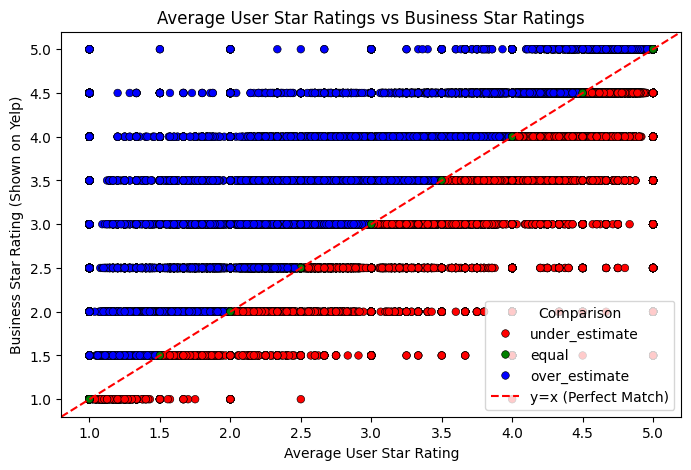

In [40]:
# Assigning categories based on conditions
def compare_rates(row):
    if row['business_star'] > row['avg_star']:
        return 'over_estimate'
    elif row['business_star'] < row['avg_star']:
        return 'under_estimate'
    else:
        return 'equal'

business_stats['star_accuracy'] = business_stats.apply(compare_rates, axis=1)

# Scatter plot with color-coded categories
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=business_stats, 
    x='avg_star', 
    y='business_star', 
    hue='star_accuracy', 
    palette={'over_estimate': 'blue', 'under_estimate': 'red', 'equal': 'green'}, 
    s=30, 
    edgecolor='black'
)

# Reference line for equal ratings
plt.axline((2, 2), slope=1, linestyle="--", color="red", label="y=x (Perfect Match)")

# Titles and labels
plt.title('Average User Star Ratings vs Business Star Ratings')
plt.xlabel('Average User Star Rating')
plt.ylabel('Business Star Rating (Shown on Yelp)')
plt.legend(title="Comparison")
plt.show()


/var/folders/8l/bxwf2d8s7f7c_zw0k867zmhc0000gn/T/ipykernel_37655/1911321130.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette={"Overestimated": "blue", "Underestimated": "red", "Equal": "green"})


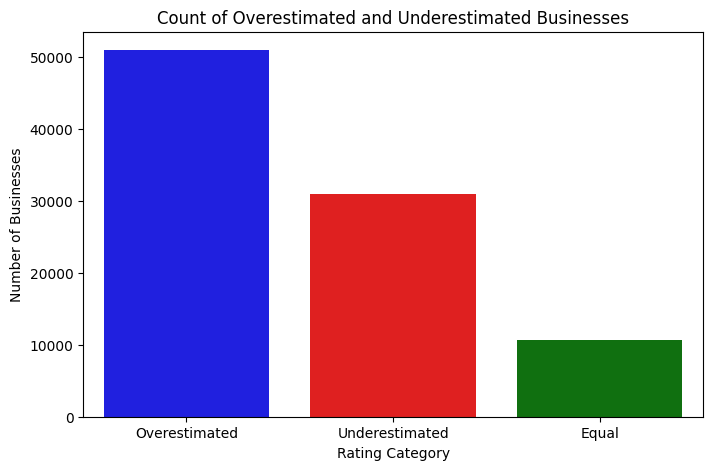

In [41]:
# Define overestimated and underestimated stores
business_stats['rating_diff'] = business_stats['business_star'] - business_stats['avg_star']

# Categorize businesses based on rating differences
business_stats['rating_category'] = business_stats['rating_diff'].apply(
    lambda x: 'Overestimated' if x > 0 else ('Underestimated' if x < 0 else 'Equal')
)
# Count the number of overestimated, underestimated, and equal rating businesses
rating_counts = business_stats['rating_category'].value_counts()

# Bar plot for count of overestimated and underestimated businesses
plt.figure(figsize=(8, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette={"Overestimated": "blue", "Underestimated": "red", "Equal": "green"})
plt.title("Count of Overestimated and Underestimated Businesses")
plt.xlabel("Rating Category")
plt.ylabel("Number of Businesses")
plt.show()


## 6. Sentiment Analysis of Reviews
**Purpose:** We extract sentiment scores from review text to understand whether users generally leave positive or negative feedback.

**Findings:** If the histogram skews to the right, reviews are mostly positive. A left-skew suggests more negative reviews.


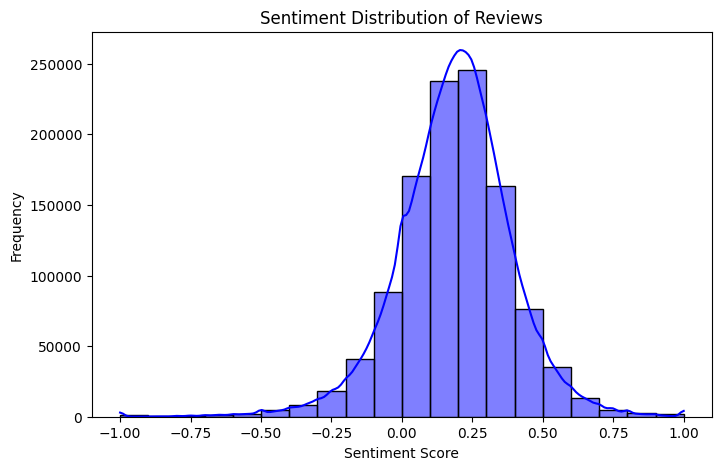

In [42]:
df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
plt.figure(figsize=(8,5))
sns.histplot(df['sentiment'], bins=20, kde=True, color='blue')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

## 7. Useful Category Exploration


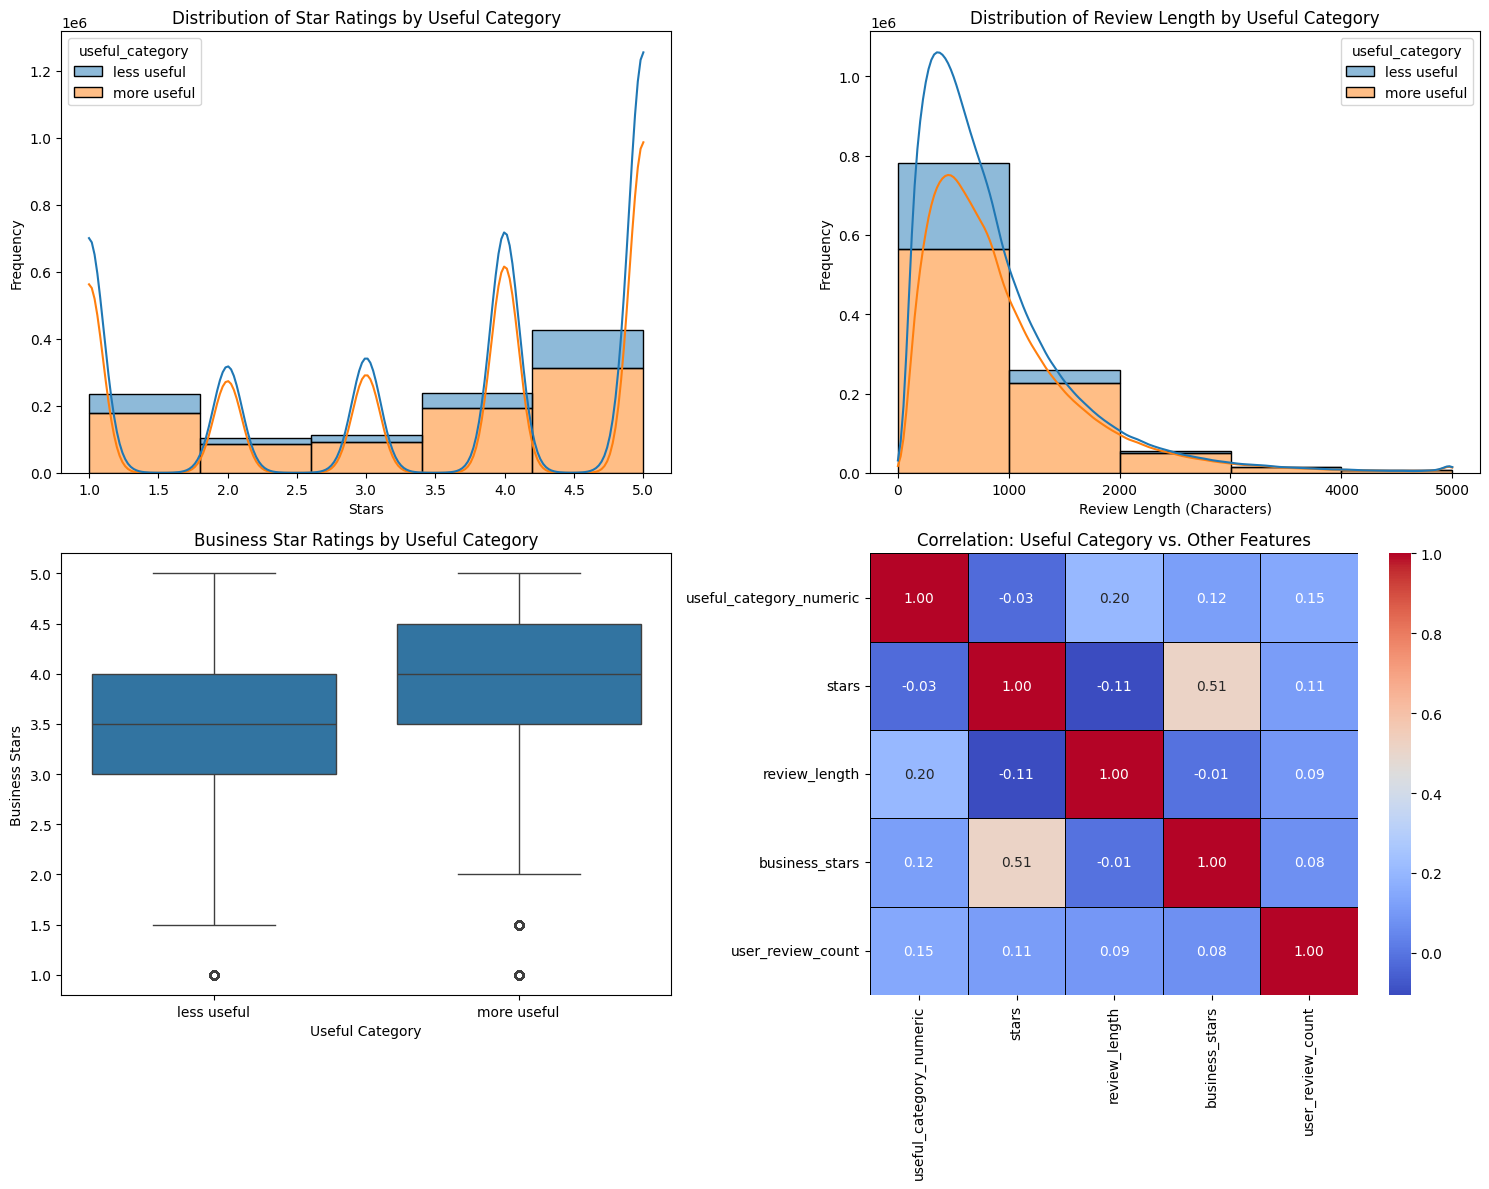

In [43]:
df["review_length"] = df["text"].astype(str).apply(len)
# Convert useful_category to numeric for correlation analysis
df['useful_category_numeric'] = df['useful_category'].map({'less useful': 0, 'more useful': 1})

# Select numerical features for correlation analysis
corr_features = ['useful_category_numeric', 'stars', 'review_length', 'business_stars', 'user_review_count']

# Compute correlation matrix
corr_matrix = df[corr_features].corr()

# Create figure for subplots (2 rows x 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribution of Star Ratings by Useful Category
sns.histplot(df, x="stars", hue="useful_category", bins=5, kde=True, multiple="stack", ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Star Ratings by Useful Category")
axes[0, 0].set_xlabel("Stars")
axes[0, 0].set_ylabel("Frequency")

# Distribution of Review Length by Useful Category
df["review_length"] = df["text"].astype(str).apply(len)
sns.histplot(df, x="review_length", hue="useful_category", bins=5, kde=True, multiple="stack", ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Review Length by Useful Category")
axes[0, 1].set_xlabel("Review Length (Characters)")
axes[0, 1].set_ylabel("Frequency")

# Boxplot of Business Star Ratings by Useful Category
sns.boxplot(data=df, x="useful_category", y="business_stars", ax=axes[1, 0])
axes[1, 0].set_title("Business Star Ratings by Useful Category")
axes[1, 0].set_xlabel("Useful Category")
axes[1, 0].set_ylabel("Business Stars")

# Correlation Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black', ax=axes[1, 1])
axes[1, 1].set_title("Correlation: Useful Category vs. Other Features")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


/var/folders/8l/bxwf2d8s7f7c_zw0k867zmhc0000gn/T/ipykernel_37655/1835475774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="useful_category", y="sentiment", palette="pastel")


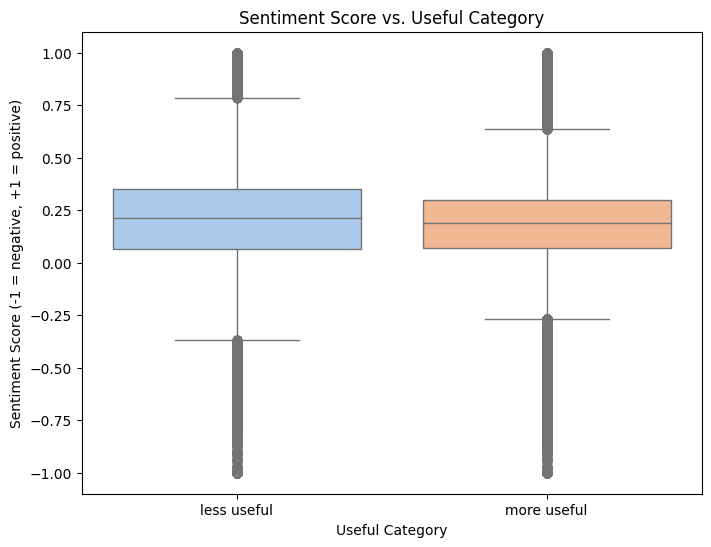

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="useful_category", y="sentiment", palette="pastel")
plt.title("Sentiment Score vs. Useful Category")
plt.xlabel("Useful Category")
plt.ylabel("Sentiment Score (-1 = negative, +1 = positive)")
plt.show()

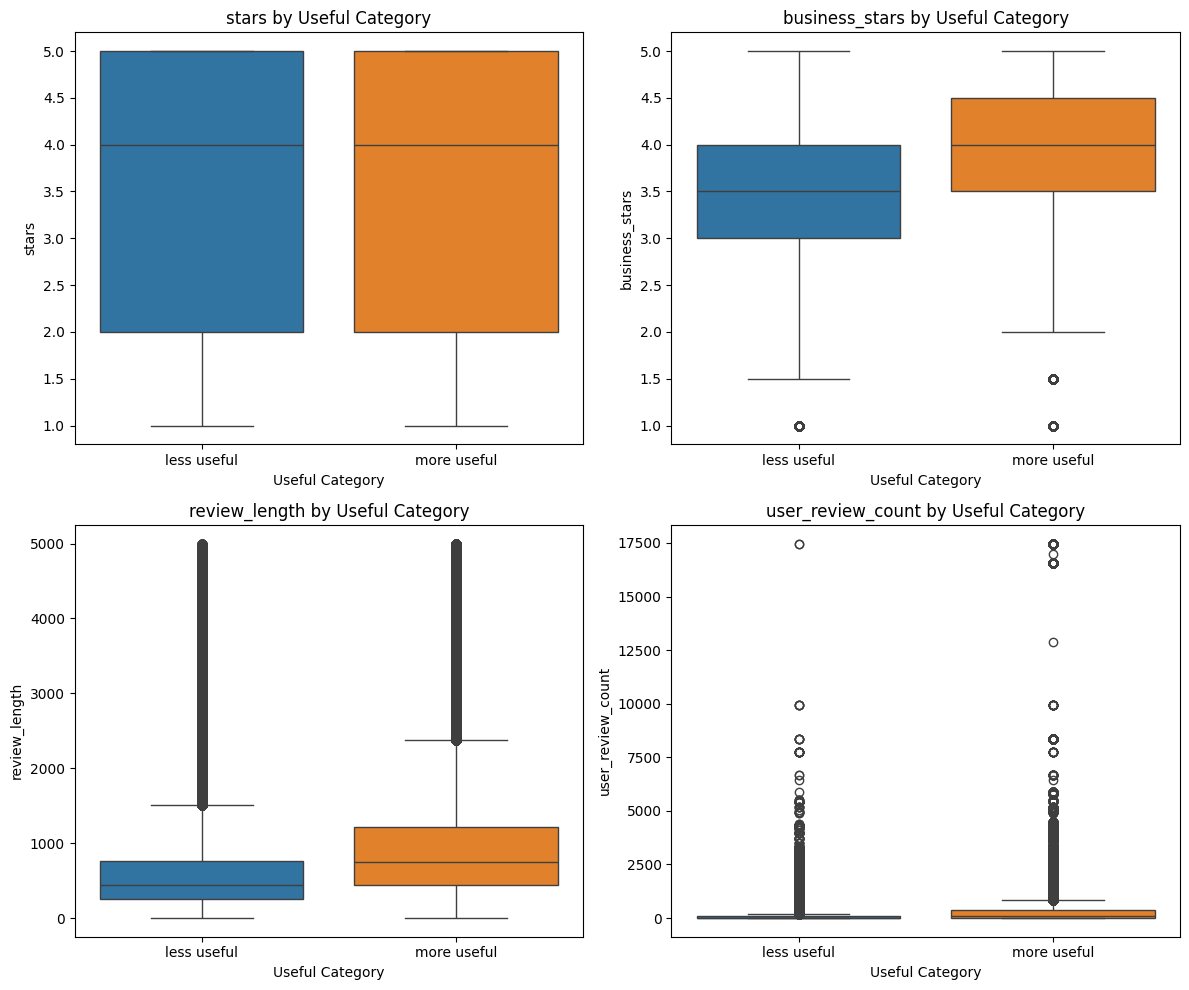

In [45]:
numeric_features = ["stars", "business_stars", "review_length", "user_review_count"]

# 1) Melt the dataframe
df_melted = df.melt(
    id_vars="useful_category",       # column to keep fixed
    value_vars=numeric_features,     # columns to unpivot
    var_name="Feature",             # new column to indicate which numeric feature
    value_name="Value"              # new column for the feature values
)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot each numeric feature in a separate subplot
for i, feature in enumerate(numeric_features):
    row = i // 2
    col = i % 2
    
    sns.boxplot(data=df, x="useful_category", y=feature, ax=axes[row, col],hue='useful_category')
    axes[row, col].set_title(f"{feature} by Useful Category")
    axes[row, col].set_xlabel("Useful Category")
    axes[row, col].set_ylabel(feature)


plt.tight_layout()
plt.show()


In [46]:
df['useful_category'].value_counts()

useful_category
more useful    862571
less useful    255236
Name: count, dtype: int64

## 8. Useful Exploration


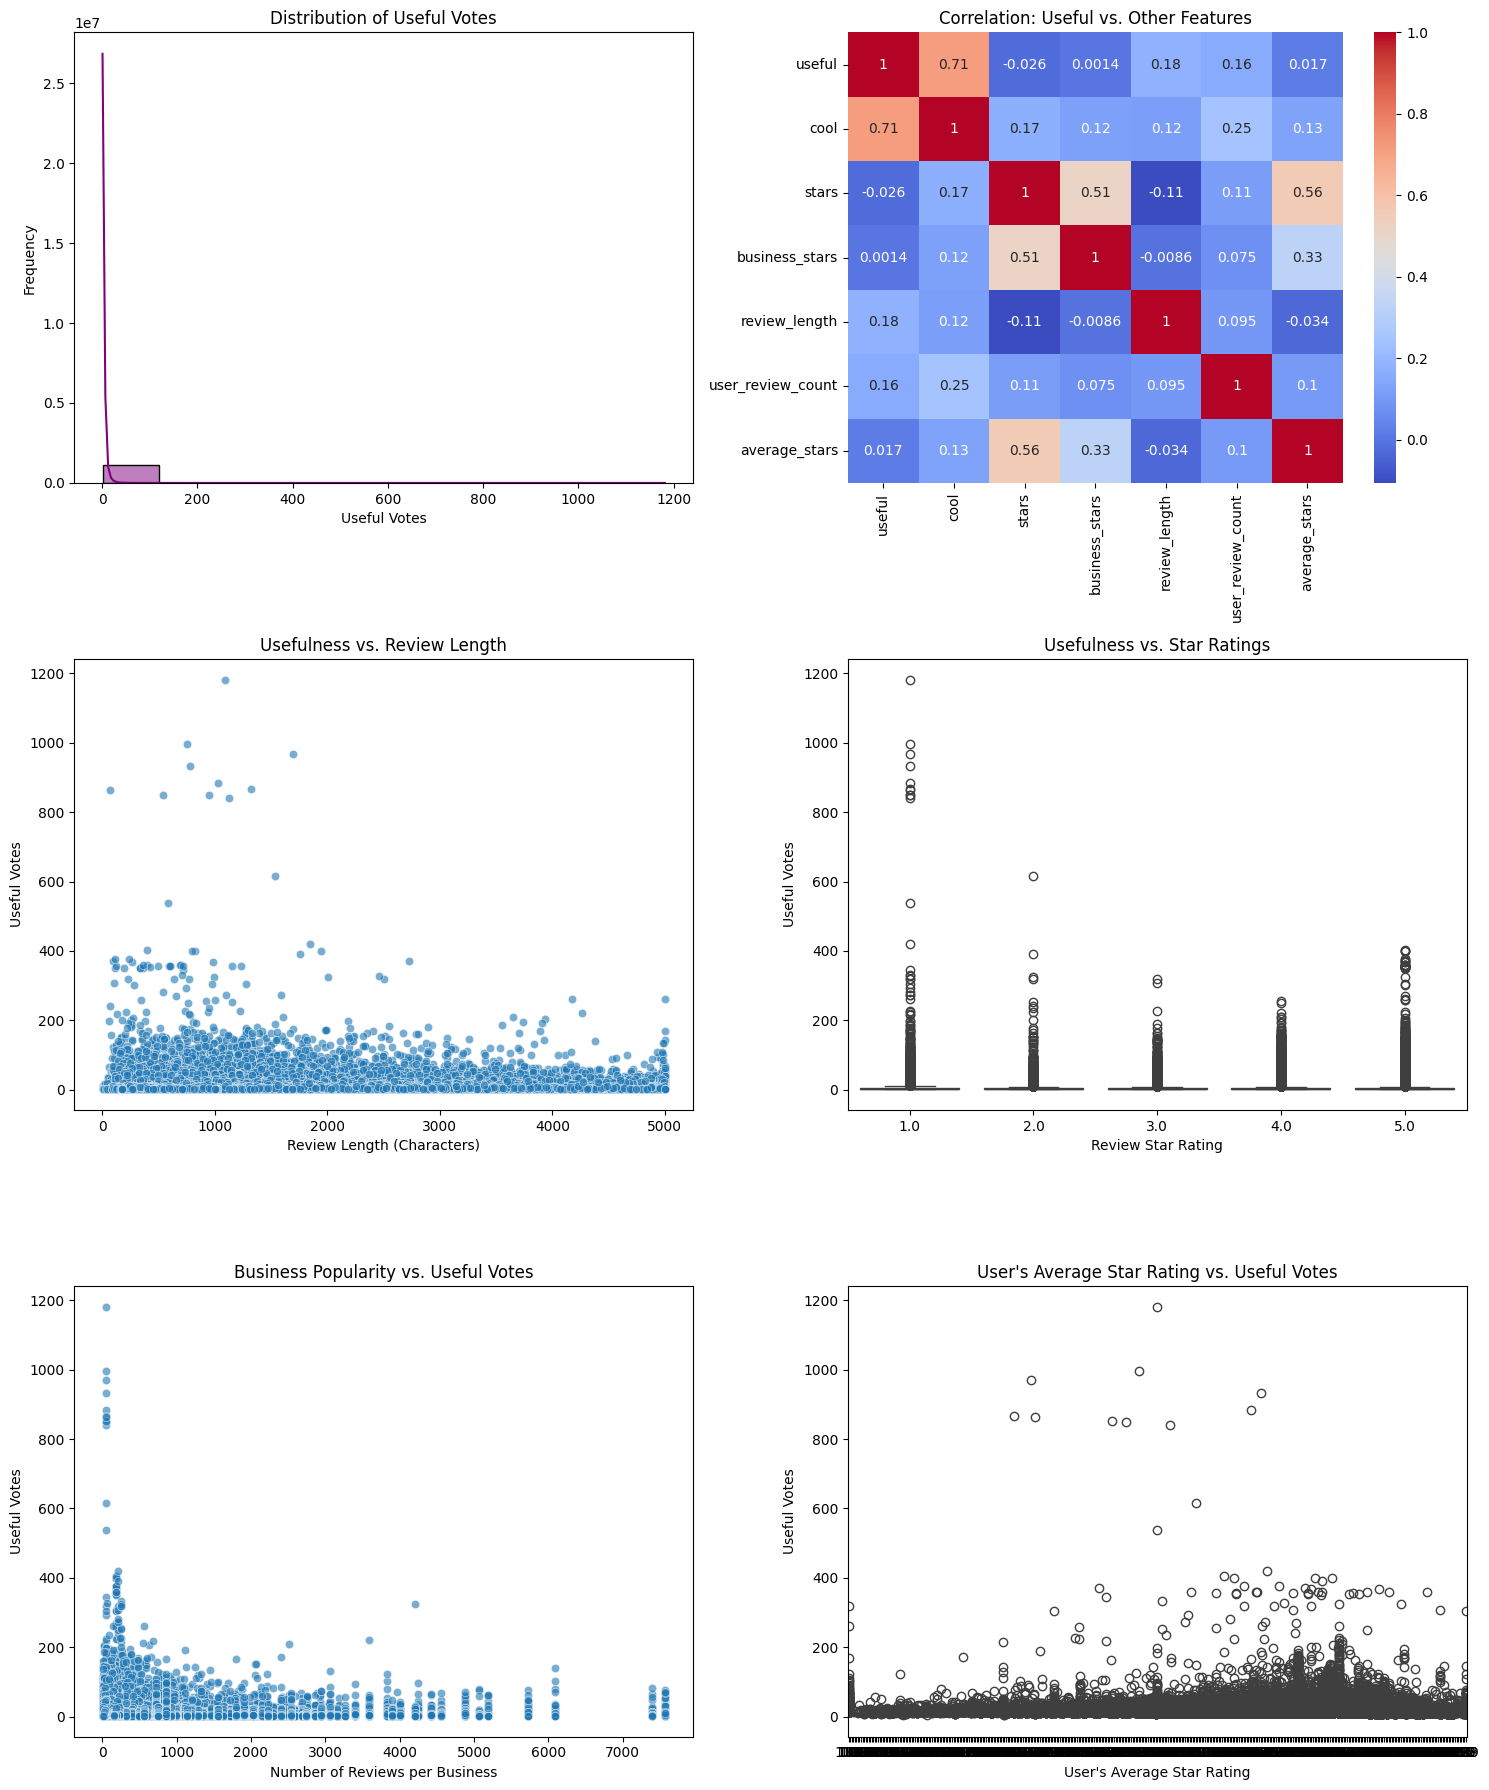

In [47]:

fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Distribution of Usefulness Votes
sns.histplot(df['useful'], bins=10, kde=True, color='purple', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Useful Votes')
axes[0, 0].set_xlabel('Useful Votes')
axes[0, 0].set_ylabel('Frequency')

# Correlation Heatmap (useful vs. numeric columns)
corr_matrix = df[['useful', 'cool', 'stars', 'business_stars', 'review_length', 'user_review_count', 'average_stars']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title("Correlation: Useful vs. Other Features")

# Usefulness vs. Review Length
sns.scatterplot(data=df, x="review_length", y="useful", alpha=0.6, ax=axes[1, 0])
axes[1, 0].set_title("Usefulness vs. Review Length")
axes[1, 0].set_xlabel("Review Length (Characters)")
axes[1, 0].set_ylabel("Useful Votes")

# Usefulness vs. Star Ratings
sns.boxplot(data=df, x="stars", y="useful", ax=axes[1, 1])
axes[1, 1].set_title("Usefulness vs. Star Ratings")
axes[1, 1].set_xlabel("Review Star Rating")
axes[1, 1].set_ylabel("Useful Votes")

# Usefulness vs. Business Popularity (Business Review Count)
sns.scatterplot(data=df, x="business_review_count", y="useful", alpha=0.6, ax=axes[2, 0])
axes[2, 0].set_title("Business Popularity vs. Useful Votes")
axes[2, 0].set_xlabel("Number of Reviews per Business")
axes[2, 0].set_ylabel("Useful Votes")

# Usefulness vs. User's Average Star Rating
sns.boxplot(data=df, x="average_stars", y="useful", ax=axes[2, 1])
axes[2, 1].set_title("User's Average Star Rating vs. Useful Votes")
axes[2, 1].set_xlabel("User's Average Star Rating")
axes[2, 1].set_ylabel("Useful Votes")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()